# **Importing Necessary Modules**

---



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading the Dataset**

---



In [45]:
df = pd.read_csv("black_friday_train.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [47]:
df.shape

(550068, 12)

In [48]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [49]:
df["Occupation"].nunique()

21

In [50]:
df["Product_Category_1"].nunique()

20

In [51]:
df["Product_Category_2"].nunique()

17

In [52]:
df["Product_Category_3"].nunique()

15

# **Checking for NULL Values**

---



In [53]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

## **Handling Category-2 NULL Values**

---



In [54]:
cat2_med = df["Product_Category_2"].median()
cat2_med

9.0

In [55]:
df["Product_Category_2"] = df["Product_Category_2"].fillna(cat2_med)

## **Handling Category-3 NULL Values**

---



In [56]:
cat3_med = df["Product_Category_3"].median()
cat3_med

14.0

In [57]:
df["Product_Category_3"] = df["Product_Category_3"].fillna(cat3_med)

In [58]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [59]:
df = df.dropna()

In [60]:
df.shape

(550068, 12)

In [61]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

# **Data Visualisation**

---



<Axes: xlabel='Gender', ylabel='count'>

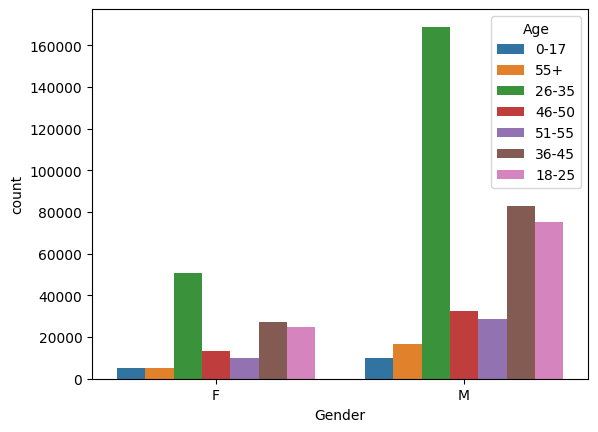

In [62]:
sns.countplot(x="Gender", hue="Age", data=df)

<Axes: xlabel='City_Category', ylabel='count'>

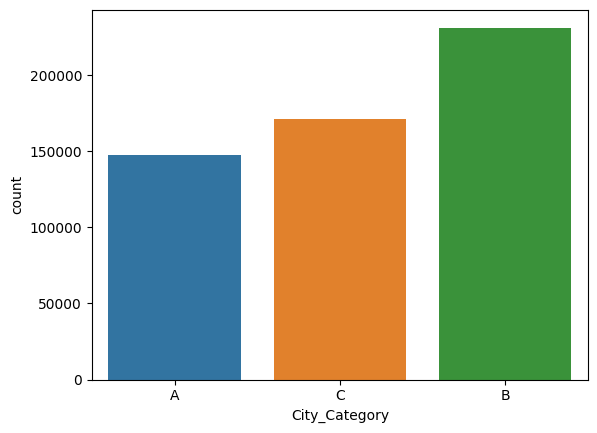

In [63]:
sns.countplot(x="City_Category", data=df)

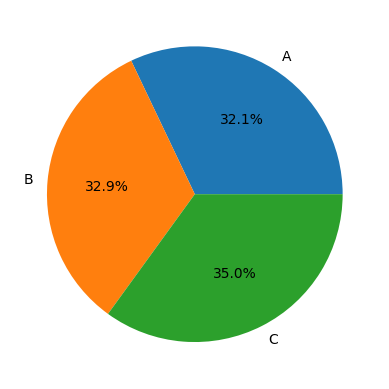

In [64]:
purch_mean = df["Purchase"].groupby(df["City_Category"]).mean()
labels = list(purch_mean.index)
plt.pie(purch_mean, labels=labels, autopct='%1.1f%%')
plt.show()

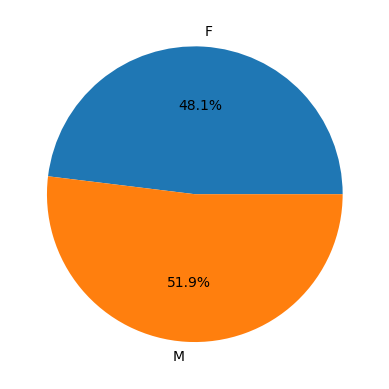

In [65]:
purch_mean = df["Purchase"].groupby(df["Gender"]).mean()
labels = list(purch_mean.index)
plt.pie(purch_mean, labels=labels, autopct='%1.1f%%')
plt.show()

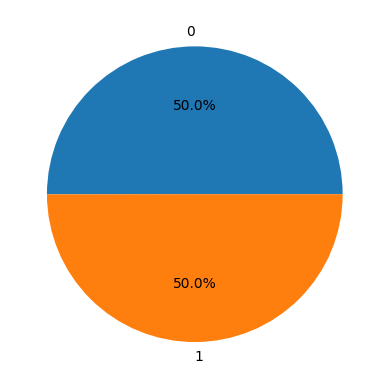

In [66]:
purch_mean = df["Purchase"].groupby(df["Marital_Status"]).mean()
labels = list(purch_mean.index)
plt.pie(purch_mean, labels=labels, autopct='%1.1f%%')
plt.show()

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

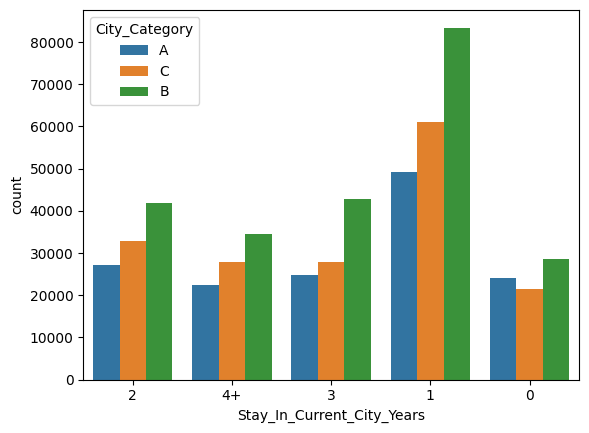

In [67]:
sns.countplot(x="Stay_In_Current_City_Years", data=df, hue="City_Category")

<Axes: >

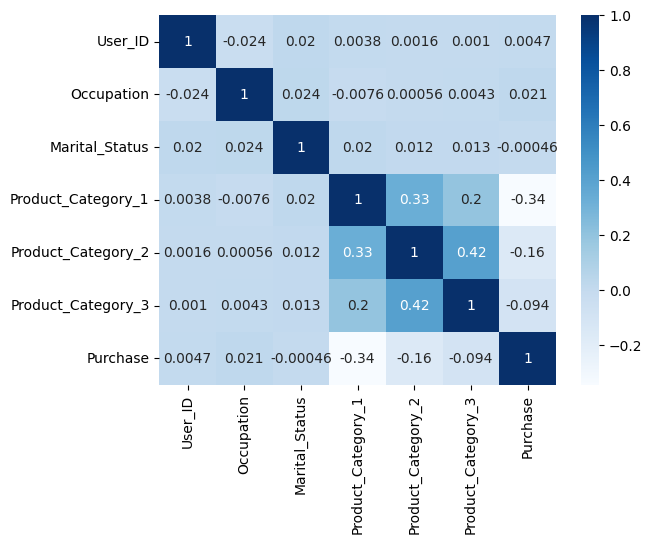

In [68]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="Blues")

# **Splitting into Dependent & Independent Variables**

---



In [69]:
drop_cols = ["User_ID", "Product_ID", "Marital_Status", "Purchase"]

In [70]:
X = df.drop(drop_cols, axis=1)
y = df["Purchase"]

In [71]:
X.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3
0,F,0-17,10,A,2,3,9.0,14.0
1,F,0-17,10,A,2,1,6.0,14.0
2,F,0-17,10,A,2,12,9.0,14.0
3,F,0-17,10,A,2,12,14.0,14.0
4,M,55+,16,C,4+,8,9.0,14.0


# **Encoding**

---



In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [73]:
cat_cols = ["Gender", "Age", "City_Category", "Stay_In_Current_City_Years"]

In [74]:
X[cat_cols] = X[cat_cols].apply(le.fit_transform)

In [75]:
X.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3
0,0,0,10,0,2,3,9.0,14.0
1,0,0,10,0,2,1,6.0,14.0
2,0,0,10,0,2,12,9.0,14.0
3,0,0,10,0,2,12,14.0,14.0
4,1,6,16,2,4,8,9.0,14.0


# **Feature Scaling**

---



In [76]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

In [77]:
X_Scaled = pd.DataFrame(ms.fit_transform(X))

In [78]:
X_Scaled.head()

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.5,0.0,0.5,0.105263,0.4375,0.733333
1,0.0,0.0,0.5,0.0,0.5,0.000000,0.2500,0.733333
2,0.0,0.0,0.5,0.0,0.5,0.578947,0.4375,0.733333
3,0.0,0.0,0.5,0.0,0.5,0.578947,0.7500,0.733333
4,1.0,1.0,0.8,1.0,1.0,0.368421,0.4375,0.733333


# **Splitting into Training & Testing Set**

---



In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, test_size=0.2, random_state=0)

In [81]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(440054, 8)
(110014, 8)
(440054,)
(110014,)


# **Model Building - Linear Regression**

---



In [82]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [83]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [84]:
y_preds1 = lr_model.predict(X_test)

In [85]:
lr_model.score(X_test, y_test)

0.12615281906685005

In [86]:
from sklearn.metrics import mean_squared_error

In [87]:
mse1 = mean_squared_error(y_test, y_preds1)
rmse1 = np.sqrt(mse1)
rmse1

4697.492434809668

# **Model Building - Random Forest Regressor**

---



In [88]:
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor()

In [89]:
params = {"n_estimators":[100,120,140,150],
          "min_samples_split" : [2,4,8],
          "bootstrap": [True, False],
          }

In [90]:
from sklearn.model_selection import GridSearchCV

rfr_cv = GridSearchCV(estimator=rfr_model, param_grid = params,
                      cv=10, scoring = "accuracy")

In [91]:
rfr_model.fit(X_train, y_train)

RandomForestRegressor()

In [92]:
y_preds2 = rfr_model.predict(X_test)

In [93]:
rfr_model.score(X_test, y_test)

0.633458378111664

In [94]:
mse2 = mean_squared_error(y_test, y_preds2)
rmse2 = np.sqrt(mse2)
rmse2

3042.3557318278513

# **Model Building - XGBoost Regressor**

---



In [95]:
from xgboost import XGBRegressor
xgbr_model = XGBRegressor()

In [96]:
params = {'gamma' :[i/10.0 for i in range(0,5)],
          'max_depth' : [2,4,6,8,10,12,13,15],
          'min_child_weight':[1,2,5,10],
          'max_delta_step':[0,1,2,5,10],
          'scale_pos_weight':[1,2,3,4,5,6,7,8,9],
          'subsample' :[i/10.0 for i in range(5,10)],
          'colsample_bytree' :[i/10.0 for i in range(5,10)],
          'colsample_bylevel' :[i/10.0 for i in range(5,10)],
          'class_weight':['balanced'],
          'reg_lambda' : [1e-5,1e-2,0.1,1,100],
          'reg_alpha' : [1e-5,1e-2,0.1,1,100],
          'n_estimators' : [100,150,200,300]
          }


In [97]:
xgbr_cv = GridSearchCV(estimator=xgbr_model, param_grid = params,
                      cv=10, scoring = "accuracy")

In [190]:
#xgbr_cv.fit(X_train, y_train)

In [102]:
xgbr_model = XGBRegressor(objective= 'reg:squarederror',colsample_bylevel=1,
                          colsample_bytree=1, gamma=0.9, learning_rate=0.9,
                          max_delta_step=0, max_depth=13,
                          min_child_weight=4, n_estimators=10,
                          nthread=None,reg_alpha=0.5,reg_lambda=1,
                          subsample=1,seed=1122)

In [103]:
xgbr_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None, colsample_bylevel=1,
             colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.9, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.9, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
             max_depth=13, max_leaves=None, min_child_weight=4, missing=nan,
             monotone_constraints=None, n_estimators=10, n_jobs=None,
             nthread=None, num_parallel_tree=None, predictor=None, ...)

In [104]:
y_preds3 = xgbr_model.predict(X_test)

In [105]:
xgbr_model.score(X_test, y_test)

0.6555034902106167

In [106]:
mse3 = mean_squared_error(y_test, y_preds3)
rmse3 = np.sqrt(mse3)
rmse3

2949.448094762796

# **Testing Set**

---



In [170]:
test_df = pd.read_csv("black_friday_test.csv")
test_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [171]:
test_df.shape

(233599, 11)

In [172]:
test_df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [173]:
cat2_med = test_df["Product_Category_2"].median()
cat2_med

9.0

In [174]:
test_df["Product_Category_2"] = test_df["Product_Category_2"].fillna(cat2_med)

In [175]:
cat3_med = test_df["Product_Category_3"].median()
cat3_med

14.0

In [176]:
test_df["Product_Category_3"] = test_df["Product_Category_3"].fillna(cat3_med)

In [177]:
test_df["Gender"] = test_df["Gender"].fillna(test_df["Gender"].mode()[0])

In [178]:
test_df["Age"] = test_df["Age"].fillna(test_df["Age"].mode())

In [179]:
test_df["Occupation"] = test_df["Occupation"].fillna(test_df["Occupation"].mode()[0])

In [180]:
test_df["City_Category"] = test_df["City_Category"].fillna(test_df["City_Category"].mode()[0])

In [181]:
test_df["Stay_In_Current_City_Years"] = test_df["Stay_In_Current_City_Years"].fillna(test_df["Stay_In_Current_City_Years"].mode()[0])

In [182]:
test_df["Marital_Status"] = test_df["Marital_Status"].fillna(test_df["Marital_Status"].mode()[0])

In [183]:
test_df["Product_Category_1"] = test_df["Product_Category_1"].fillna(test_df["Product_Category_1"].mode()[0])

In [184]:
test_df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

In [185]:
X = test_df.drop(drop_cols[:-1], axis=1)
X.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3
0,M,46-50,7,B,2,1,11.0,14.0
1,M,26-35,17,C,0,3,5.0,14.0
2,F,36-45,1,B,4+,5,14.0,14.0
3,F,36-45,1,B,4+,4,9.0,14.0
4,F,26-35,1,C,1,4,5.0,12.0


In [186]:
X[cat_cols] = test_df[cat_cols].apply(le.fit_transform)

In [187]:
X.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3
0,1,4,7,1,2,1,11.0,14.0
1,1,2,17,2,0,3,5.0,14.0
2,0,3,1,1,4,5,14.0,14.0
3,0,3,1,1,4,4,9.0,14.0
4,0,2,1,2,1,4,5.0,12.0


In [188]:
X = pd.DataFrame(ms.transform(X))

In [189]:
X.head()

,0,1,2,3,4,5,6,7
0,1.0,0.666667,0.35,0.5,0.50,0.000000,0.5625,0.733333
1,1.0,0.333333,0.85,1.0,0.00,0.105263,0.1875,0.733333
2,0.0,0.500000,0.05,0.5,1.00,0.210526,0.7500,0.733333
3,0.0,0.500000,0.05,0.5,1.00,0.157895,0.4375,0.733333
4,0.0,0.333333,0.05,1.0,0.25,0.157895,0.1875,0.600000


In [191]:
results1 = rfr_model.predict(X)

In [192]:
results2 = xgbr_model.predict(X)

In [193]:
subs1 = pd.DataFrame({"Purchase":results1,
                      "User_ID":test_df["User_ID"],
                      "Product_ID": test_df["Product_ID"]}
                     )
subs1.head()

,Purchase,User_ID,Product_ID
0,16450.979685,1000004,P00128942
1,11388.157407,1000009,P00113442
2,8449.687726,1000010,P00288442
3,2401.350000,1000010,P00145342
4,3013.249396,1000011,P00053842


In [194]:
subs2 = pd.DataFrame({"Purchase":results2,
                      "User_ID":test_df["User_ID"],
                      "Product_ID": test_df["Product_ID"]}
                     )
subs2.head()

,Purchase,User_ID,Product_ID
0,16356.038086,1000004,P00128942
1,12170.324219,1000009,P00113442
2,6934.901367,1000010,P00288442
3,2615.026611,1000010,P00145342
4,2184.800537,1000011,P00053842


In [195]:
subs1.to_csv("submission1.csv")

In [196]:
subs2.to_csv("submission2.csv")